**Alle imports**

In [1]:
from functies import *
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
import csv
import random


**Laad de dataset**

In [2]:
dfr = pd.read_csv('data/movie-1.csv')

# Toon de maximale informatie die de dataframe kan geven.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Formatteer alle grote getallen voor een betere leesbaarheid.
pd.set_option('display.float_format', '{:,.2f}'.format)

**Kopie van de dataset**


Een kopie van de gegevens maken om mee te werken,
zodat we het oorspronkelijke dataset niet wijzigen.

In [3]:
df = dfr.copy()

**Een kijkje nemen naar de gegevens die we hebben gekregen.**

In [4]:
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.00,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


**Haal de kolomnamen op om te zien met wat voor soort variabelen we werken**

In [5]:
for col in df.columns:
    print(f"column: {col}, dtype: {df[col].dtype}")

column: color, dtype: object
column: director_name, dtype: object
column: num_critic_for_reviews, dtype: float64
column: duration, dtype: float64
column: director_facebook_likes, dtype: float64
column: actor_3_facebook_likes, dtype: float64
column: actor_2_name, dtype: object
column: actor_1_facebook_likes, dtype: float64
column: gross, dtype: float64
column: genres, dtype: object
column: actor_1_name, dtype: object
column: movie_title, dtype: object
column: num_voted_users, dtype: int64
column: cast_total_facebook_likes, dtype: int64
column: actor_3_name, dtype: object
column: facenumber_in_poster, dtype: float64
column: plot_keywords, dtype: object
column: movie_imdb_link, dtype: object
column: num_user_for_reviews, dtype: float64
column: language, dtype: object
column: country, dtype: object
column: content_rating, dtype: object
column: budget, dtype: float64
column: title_year, dtype: float64
column: actor_2_facebook_likes, dtype: float64
column: imdb_score, dtype: float64
column: 

**Meetniveaus**

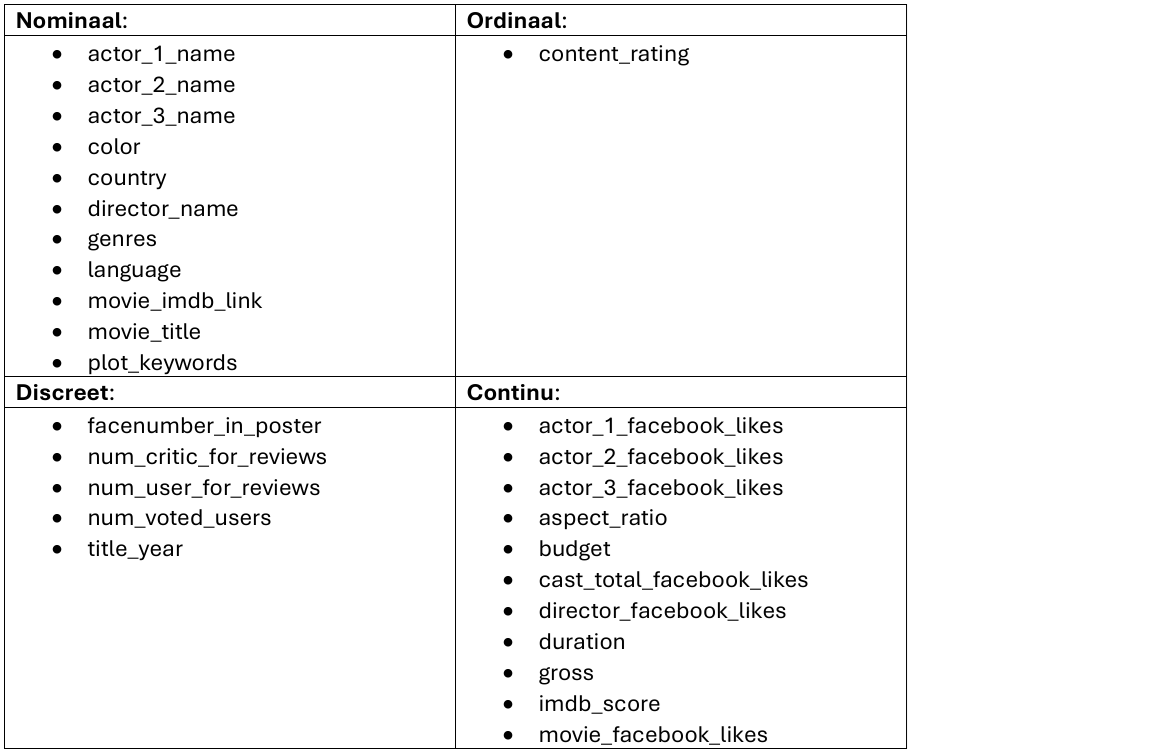

In [6]:
display(Image(filename="meetniveaus.png"))

**Doel- en kenmerkenvariabelen**

In [7]:
featureVariables = ['director_name', 'director_facebook_likes',
                    'actor_1_name', 'actor_1_facebook_likes', 
                    'actor_2_name', 'actor_2_facebook_likes', 
                    'actor_3_name', 'actor_3_facebook_likes', 
                    'cast_total_facebook_likes',
                    'movie_facebook_likes',
                    'imdb_score']

targetVariable = ['gross']

numVariable =   ['director_facebook_likes', 
                'actor_1_facebook_likes', 
                'actor_2_facebook_likes', 
                'actor_3_facebook_likes', 
                'cast_total_facebook_likes', 
                'movie_facebook_likes', 
                'imdb_score',
                'gross']

**Maak een andere dataframe met alleen de kolommen waarin we geïnteresseerd zijn.**

In [8]:
print(df.shape) #check impact
df = df[featureVariables + targetVariable]
print(df.shape) #check impact

(5043, 28)
(5043, 12)


In [9]:
df.head(1)

,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,gross
0,James Cameron,0.00,CCH Pounder,"1,000.00",Joel David Moore,936.00,Wes Studi,855.00,4834,33000,7.90,"760,505,847.00"


**Controleer NaN-waarden**

Verwijder voorlopig alle NaN-waarden in de kenmerken- en doelvariabelen. Later zullen we verder onderzoeken hoe we deze op de juiste manier kunnen verwerken.

In [10]:
df.isna().sum()

director_name                104
director_facebook_likes      104
actor_1_name                   7
actor_1_facebook_likes         7
actor_2_name                  13
actor_2_facebook_likes        13
actor_3_name                  23
actor_3_facebook_likes        23
cast_total_facebook_likes      0
movie_facebook_likes           0
imdb_score                     0
gross                        884
dtype: int64

We zullen alle NaN-waarden verwijderen. We kunnen ze niet vervangen, omdat de meerderheid onze doelvariabele bevat.

In [11]:
print(df.shape) #check impact
df = df.dropna()
print(df.shape) #check impact

(5043, 12)
(4143, 12)


**Nu zullen we alle kolommen analyseren om te controleren op anomalieën.**

Alle statistieken zien er schoon uit.

Alle kolommen met 'namen' bevatten NaN en getallen waar dit verwacht wordt.

Alle kolommen met 'likes' bevatten NaN en een getal waar dit verwacht wordt. Ook geen vreemde minimale of maximale waarden.

De kolom 'imdb_score' heeft alleen waarden tussen 0 en 10, wat verwacht wordt.

En tot slot heeft de kolom 'gross' een natuurlijke orde van grootte van min tot max.

In [12]:
df.describe(include="all")

,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,gross
count,4143,"4,143.00",4143,"4,143.00",4143,"4,143.00",4143,"4,143.00","4,143.00","4,143.00","4,143.00","4,143.00"
unique,1870,NaN,1611,NaN,2433,NaN,2867,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,Robert De Niro,NaN,Morgan Freeman,NaN,Steve Coogan,NaN,NaN,NaN,NaN,NaN
freq,25,NaN,42,NaN,20,NaN,8,NaN,NaN,NaN,NaN,NaN
mean,NaN,749.23,NaN,"7,361.56",NaN,"1,892.58",NaN,724.28,"10,920.21","8,757.63",6.47,"48,625,081.48"
std,NaN,"2,950.71",NaN,"15,067.61",NaN,"4,374.79",NaN,"1,811.38","18,541.78","20,822.02",1.05,"68,528,637.84"
min,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.00,1.60,162.00
25%,NaN,10.00,NaN,702.00,NaN,345.00,NaN,173.00,"1,755.50",0.00,5.90,"5,404,758.50"
50%,NaN,57.00,NaN,"1,000.00",NaN,651.00,NaN,416.00,"3,715.00",186.00,6.60,"25,592,632.00"
75%,NaN,218.50,NaN,"12,000.00",NaN,962.00,NaN,676.00,"15,601.50","10,000.00",7.20,"62,427,289.50"


We zullen geen van de uitschieters uit onze doelvariabele 'gross' verwijderen. Voor onze kenmerkenvariabelen zijn er echter enkele vreemde uitschieters en veel regisseurs en acteurs met 0 likes op Facebook. We moeten dieper ingaan op deze waarden en kijken of we die 0-waarden kunnen vervangen door iets anders.

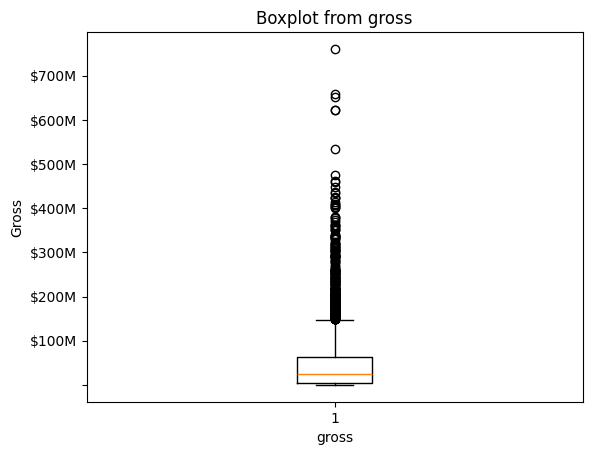

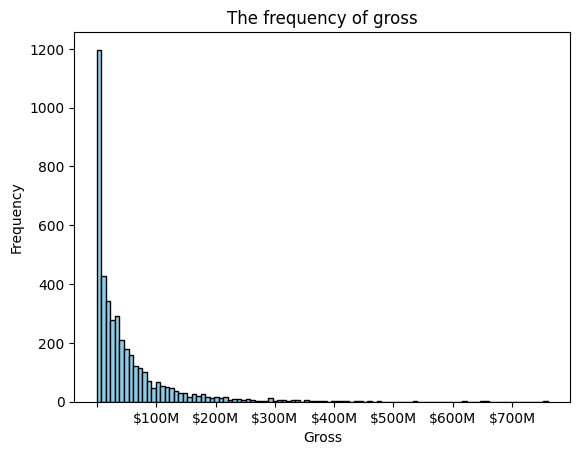

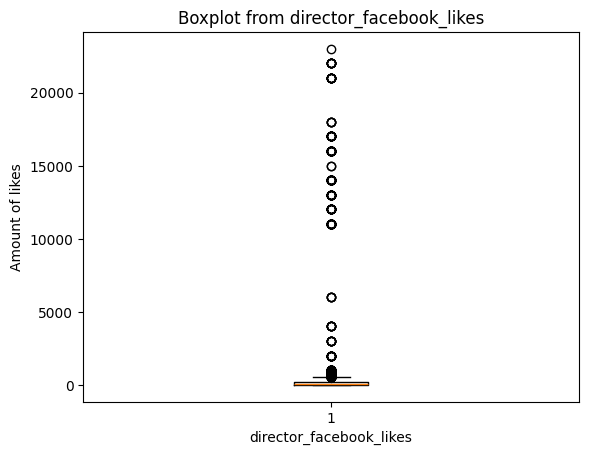

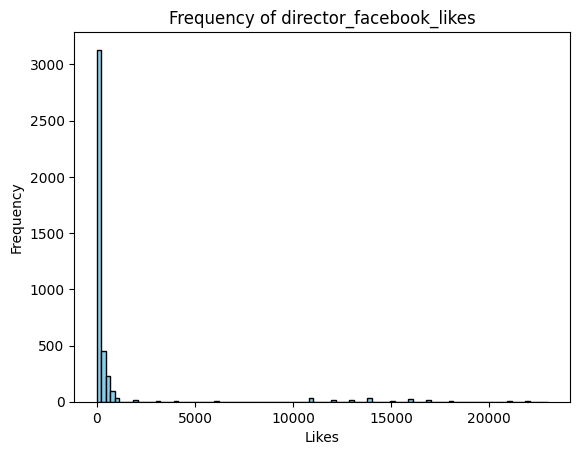

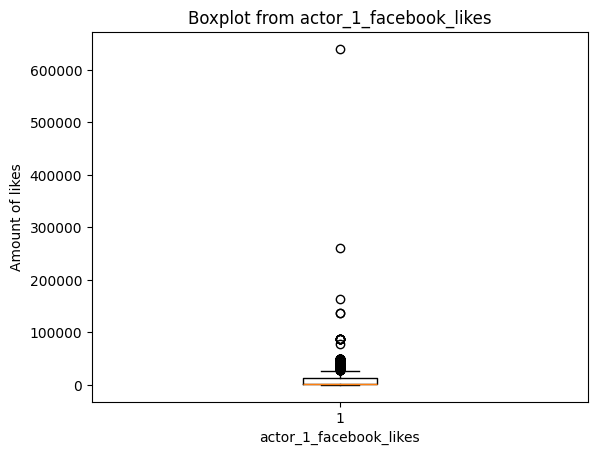

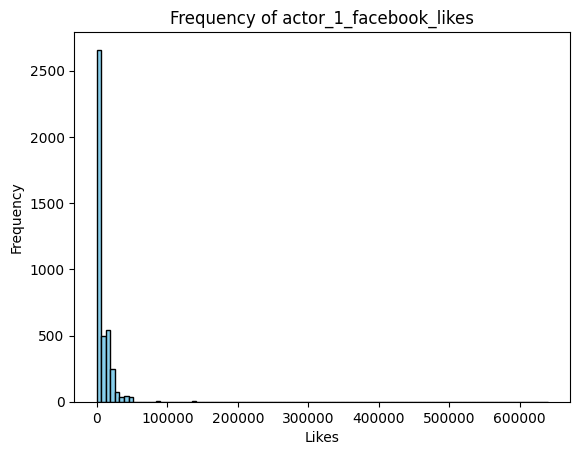

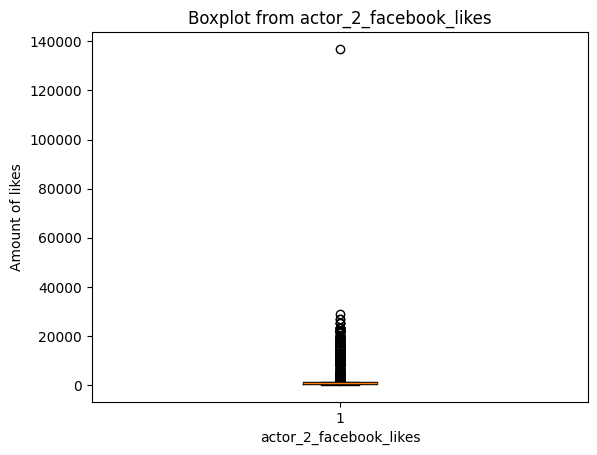

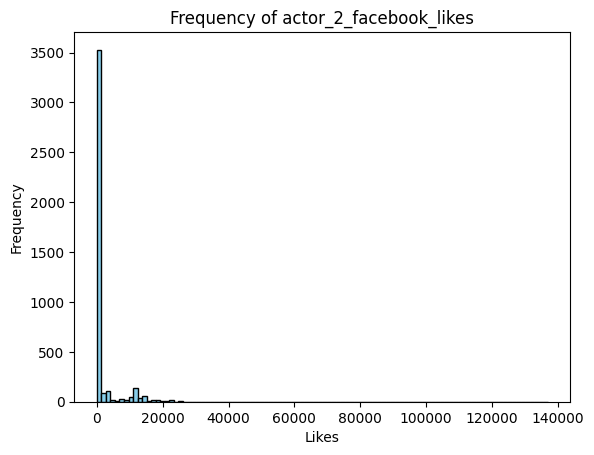

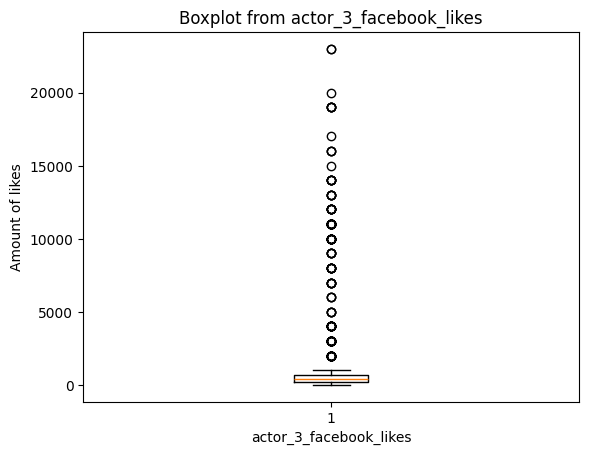

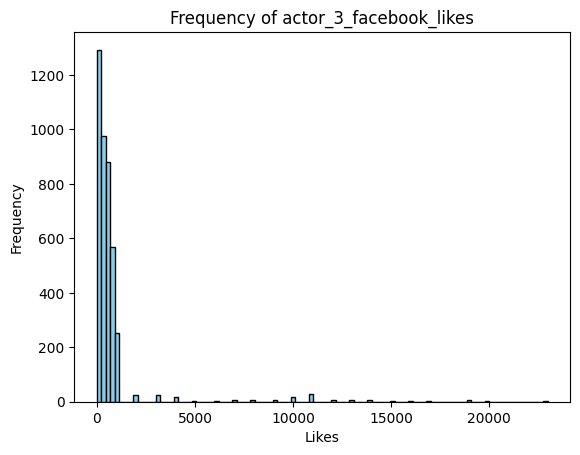

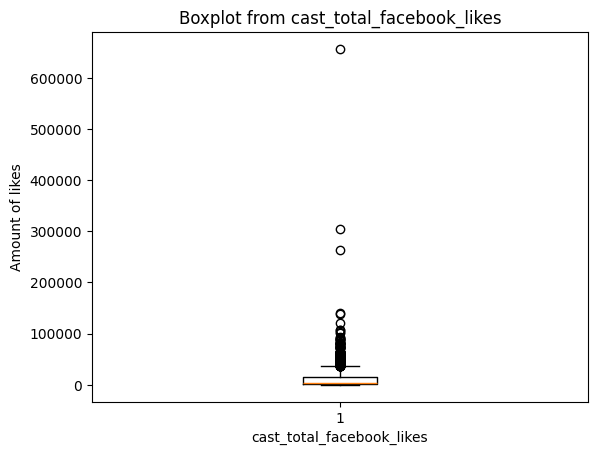

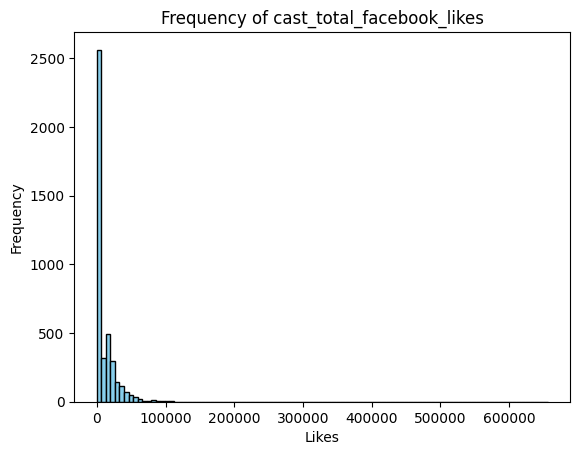

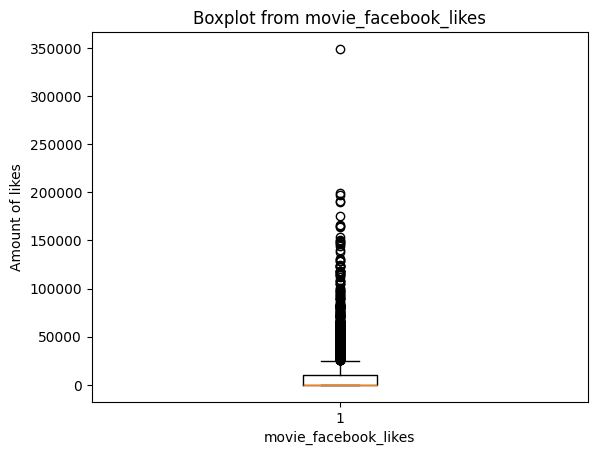

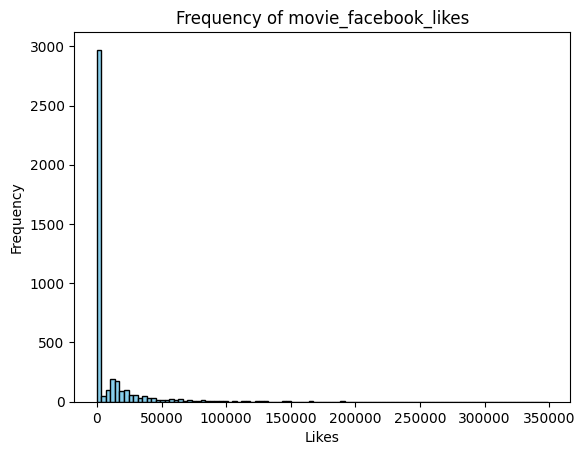

In [13]:
# print(f"Count before removing outliers: {df.shape}")
boxplot_gross(df, 'gross')
histogram_gross(df, 'gross')
# df = remove_outliers(df, 'gross')
# print(f"Count after removing outliers: {df.shape}")
# boxplot_gross(df, 'gross')
# histogram_gross(df, 'gross')

for feature in featureVariables:
    if 'like' in feature:
        # print(f"Count before removing outliers: {df.shape}")
        boxplot_likes(df, feature)
        histogram_likes(df, feature)
        # df = remove_outliers(df, feature)
        # print(f"Count after removing outliers: {df.shape}")
        # boxplot_likes(df, feature)
        # histogram_likes(df, feature)

### Scatterplots

**Bereken de numerieke variabelen tegenover de doelvariabele, zodat we kunnen zien welke kenmerken (enigszins) belangrijk zijn voor de doelvariabele**

In [14]:
correlation = df[numVariable].corr()['gross'].sort_values(ascending=False)
print(correlation)

gross                       1.00
movie_facebook_likes        0.38
actor_3_facebook_likes      0.31
actor_2_facebook_likes      0.26
cast_total_facebook_likes   0.25
imdb_score                  0.20
actor_1_facebook_likes      0.15
director_facebook_likes     0.14
Name: gross, dtype: float64


**In alle plots hieronder staat bij X-as de Totale filmopbrengsten**

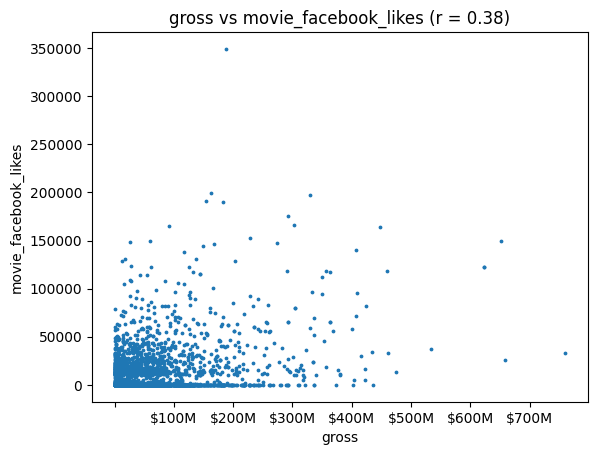

In [15]:
correlation_plot(df, 'gross', 'movie_facebook_likes')

- Y-as: Aantal Facebook likes

- We zien dat de likes toeneemt wanneer filmopbregnsten toeneemt, betekent met een hogere opbrengsten ook een er een grotere kans dat de film meer aandacht krijgt op Facebook.

- In het plot zien we een positieve correlatie 0.38, betekent de aantal Facebook likes wel een voorspellen waarde heeft.

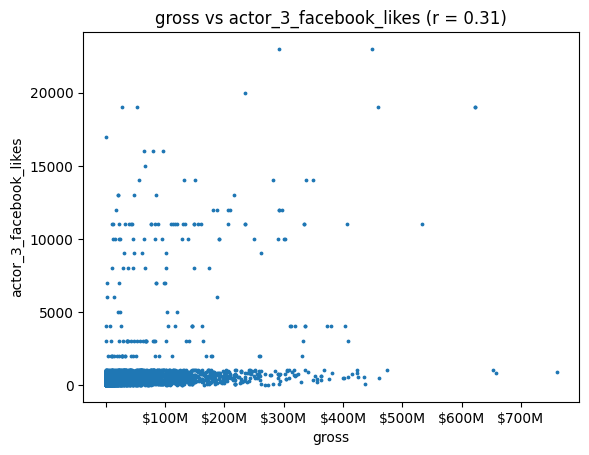

In [16]:
correlation_plot(df, 'gross', 'actor_3_facebook_likes')

- Y-as: Aantal Facebook likes van Acteur 3

- We zien dat meeste punten zijn tussen 0 en 5000 likes ook als opbrengesten sterk toeneemt, betekent opbrengsten van de film weinig mee te maken met acteur 3. 

- In het plot zien we een positieve correlatie 0.31, betekent dan een matige correlatie maar hier heeft eigenlijk weinig zin om verder te onderzoeken.


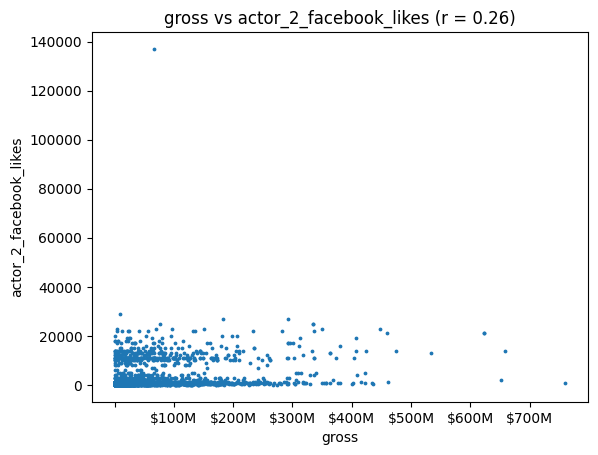

In [17]:
correlation_plot(df, 'gross', 'actor_2_facebook_likes')

- Y-as: Aantal Facebook likes van Acteur 2

- We zien dat meeste punten zijn linksonder tussen 0 en 20000 likes, betekent ook als de opbrengsten toeneemt is de likes van acteur 2 niet hoog.

- In het plot zien we een positieve correlatie 0.26, een lichte correlatie, maar ook geen waarde om verder te onderzoeken.

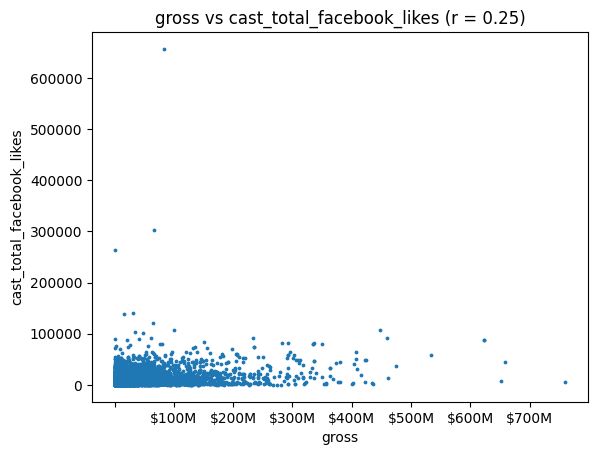

In [18]:
correlation_plot(df, 'gross', 'cast_total_facebook_likes')

- Y-as: Aantal Facebook likes van cast

- We zien dat meeste punten zijn linksonder tussen 0 en 10000 likes, betekent ook als de film een hoog opbrengsten hebben, krijg de auteurs laag Facebook likes.

- In het plot zien we een positieve correlatie 0.25, beetje zwak.

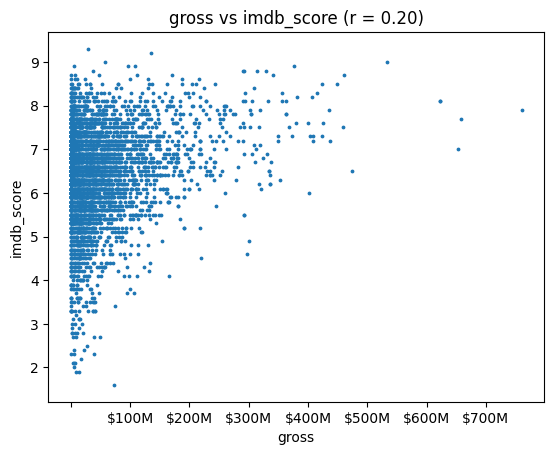

In [19]:
correlation_plot(df, 'gross', 'imdb_score')

- Y-as: IMDb-score

- We zien dat meeste scores tussen 5 en 8, met een opbrengste minder dan 200M dollar, betekent hogere opbrengsten levert niet een hogere score.

- In het plot zien we een positieve correlatie 0.20, zwak, geen voorspelwaarde.

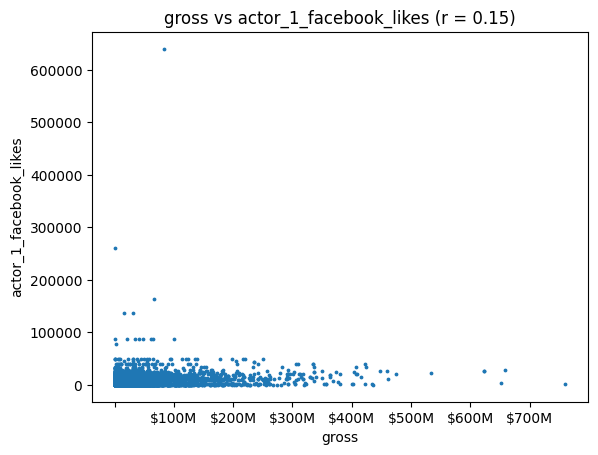

In [20]:
correlation_plot(df, 'gross', 'actor_1_facebook_likes')

- Y-as: Aantal Facebook likes van Acteur 1

- We zien dat meeste punten zijn linksonder tussen 0 en 10000 likes, de likes vam auteur 1 heeft weinig mee te maken met de opbrengsten van de film.

- In het plot zien we een positieve correlatie 0.15, zwak, zwak.

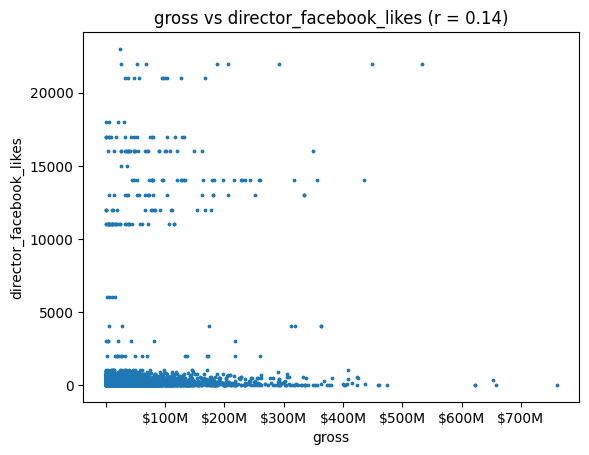

In [28]:
correlation_plot(df, 'gross', 'director_facebook_likes')

- Y-as: Aantal Facebook likes van directeur

- De meeste datapunten zijn verzamel linksonder, maar verspreid beetje ook tussen 10000 en 20000 likes, dus de opbrengesten heeft weinig mee te maken met hoe bekend de directeur is.

- In het plot zien we een positieve correlatie 0.14, zwak, zwak.

In [22]:
correlation2 = df[numVariable].corr()['imdb_score'].sort_values(ascending=False)
print(correlation2)

imdb_score                  1.00
movie_facebook_likes        0.27
gross                       0.20
director_facebook_likes     0.19
cast_total_facebook_likes   0.10
actor_2_facebook_likes      0.10
actor_1_facebook_likes      0.09
actor_3_facebook_likes      0.06
Name: imdb_score, dtype: float64


**In alle plots hieronder staat bij X-as de IMDb Score**

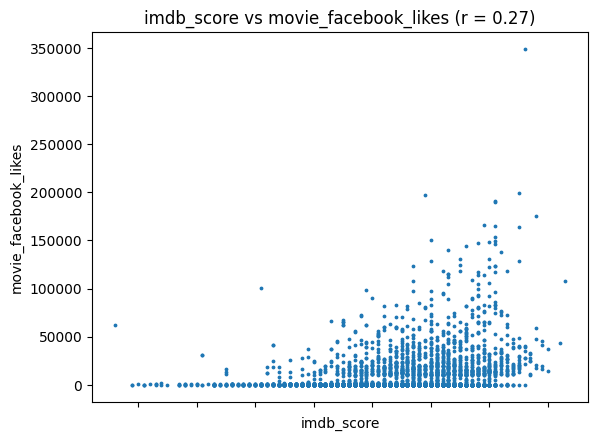

In [29]:
correlation_plot(df, 'imdb_score', 'movie_facebook_likes')

- Y-as: Aantal Facebook likes van film

- We zien dat bij verhoging van IMDb-score is er geen echt verhoging van de Facebook likes, de datapunten verspreid.

- In het plot zien we een positieve correlatie 0.27, wel matige correlatie met elkaar, maar weinig zin om hiermee verder onderzoeken.

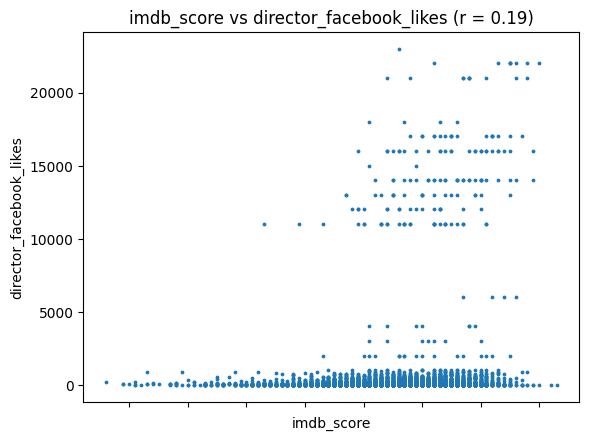

In [30]:
correlation_plot(df, 'imdb_score','director_facebook_likes')

- Y-as: Aantal Facebook likes van directeur

- De datapunten verspreid helemaal en we zien in de plots meeste datapunten onder 5000 likes liggen. De scores heeft weinig mee te maken met hoe bekend de directeur is.

- In het plot zien we een positieve correlatie 0.19, zwak.

Verder heeft weinig zin om de plots te laten zien aangezien dat er te zwak correlatie heeft.

**Wijs dummywaarden toe aan alle namen. Dit is nodig om ons model te berekenen.**

In [ ]:
#Selecteer numerieke kenmerkenvariabelen
X_numeric = df[['director_facebook_likes', 
                'actor_1_facebook_likes', 
                'actor_2_facebook_likes', 
                'actor_3_facebook_likes', 
                'cast_total_facebook_likes', 'movie_facebook_likes', 'imdb_score',
                'gross' # Zet deze regel uit wanneer je een model toepast
                ]]

#We wijzen alle andere kolomwaarden toe aan dummywaarden
X_dummies = pd.get_dummies(df[['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']], dtype = int)

#Voer de samenvoeging van de twee dataframes uit tot één dataframe
X = pd.concat([X_numeric, X_dummies], axis = 1)
y = df[['gross']]

df = X

df.head(1)

In [ ]:
print(X.shape) #check impact

### We gaan nu kijken naar alle likestatistieken per regisseur en acteur

Zoals je kunt zien, zijn er veel regisseurs en acteurs met grote films (hoge inkomsten) die nul likes krijgen op hun Facebook-pagina. Dit is vooral het geval bij regisseurs. We zullen deze waarden moeten aanvullen. Dit wordt gedaan door het toewijzen van het gemiddelde aantal likes van vergelijkbare films, gegroepeerd op basis van hun 'gross'. Een visuele weergave met de daadwerkelijke implementatie volgt volgende week.

Wanneer dit is voltooid, verwachten we dat onze correlatieplots een rechtere lijn zullen laten zien, wat duidt op een betere correlatie en waarschijnlijk de prestaties van ons model zal verbeteren.

In [ ]:
likeList = []
grossList = []

for column in df.columns:
    if 'director_name' in column:

        rowsWithDirector = df[df[column] == 1]

        infoLikes = rowsWithDirector[['director_facebook_likes']]
        infoGross = rowsWithDirector[['gross']]

        describeLikeStats = infoLikes.describe(include='all').transpose()
        describeGrossStats = infoGross.describe(include='all').transpose()

        describeLikeStats = describeLikeStats.add_prefix('likes_')
        describeGrossStats = describeGrossStats.add_prefix('gross_')

        describeLikeStats['director'] = column
        describeGrossStats['director'] = column

        likeList.append(describeLikeStats)
        grossList.append(describeGrossStats)

directorLikeStats = pd.concat(likeList).reset_index(drop=True)
directorGrossStats = pd.concat(grossList).reset_index(drop=True)

directorStats = pd.merge(directorLikeStats, directorGrossStats, on='director', how='outer')

directorStats = directorStats.sort_values(by='likes_mean', ascending=True)

directorStats.head(10)
        

In [ ]:
likeActor1List = []
grossActor1List = []

for column in df.columns:
    if 'actor_1' in column:

        rowsWithActor1 = df[df[column] == 1]

        infoLikes = rowsWithActor1[['actor_1_facebook_likes']]
        infoGross = rowsWithActor1[['gross']]

        describeLikeStats = infoLikes.describe(include='all').transpose()
        describeGrossStats = infoGross.describe(include='all').transpose()

        describeLikeStats = describeLikeStats.add_prefix('likes_')
        describeGrossStats = describeGrossStats.add_prefix('gross_')

        describeLikeStats['actor1'] = column
        describeGrossStats['actor1'] = column
        
        likeActor1List.append(describeLikeStats)
        grossActor1List.append(describeGrossStats)

actor1LikeStats = pd.concat(likeActor1List).reset_index(drop=True)
actor1GrossStats = pd.concat(grossActor1List).reset_index(drop=True)

actor1Stats = pd.merge(actor1LikeStats, actor1GrossStats, on='actor1', how='outer')

actor1Stats = actor1Stats.sort_values(by='likes_mean', ascending=True)

actor1Stats.head(10)

In [ ]:
likeActor2List = []
grossActor2List = []

for column in df.columns:
    if 'actor_2' in column:

        rowsWithActor2 = df[df[column] == 1]

        infoLikes = rowsWithActor2[['actor_2_facebook_likes']]
        infoGross = rowsWithActor2[['gross']]

        describeLikeStats = infoLikes.describe(include='all').transpose()
        describeGrossStats = infoGross.describe(include='all').transpose()

        describeLikeStats = describeLikeStats.add_prefix('likes_')
        describeGrossStats = describeGrossStats.add_prefix('gross_')

        describeLikeStats['actor2'] = column
        describeGrossStats['actor2'] = column
        
        likeActor2List.append(describeLikeStats)
        grossActor2List.append(describeGrossStats)

actor2LikeStats = pd.concat(likeActor2List).reset_index(drop=True)
actor2GrossStats = pd.concat(grossActor2List).reset_index(drop=True)

actor2Stats = pd.merge(actor2LikeStats, actor2GrossStats, on='actor2', how='outer')

actor2Stats = actor2Stats.sort_values(by='likes_mean', ascending=True)

actor2Stats.head(10)

In [ ]:
likeActor3List = []
grossActor3List = []

for column in df.columns:
    if 'actor_3' in column:
        rowsWithActor3 = df[df[column] == 1]

        infoLikes = rowsWithActor3[['actor_3_facebook_likes']]
        infoGross = rowsWithActor3[['gross']]

        describeLikeStats = infoLikes.describe(include='all').transpose()
        describeGrossStats = infoGross.describe(include='all').transpose()

        describeLikeStats = describeLikeStats.add_prefix('likes_')
        describeGrossStats = describeGrossStats.add_prefix('gross_')

        describeLikeStats['actor3'] = column
        describeGrossStats['actor3'] = column
        
        likeActor3List.append(describeLikeStats)
        grossActor3List.append(describeGrossStats)

actor3LikeStats = pd.concat(likeActor3List).reset_index(drop=True)
actor3GrossStats = pd.concat(grossActor3List).reset_index(drop=True)

actor3Stats = pd.merge(actor3LikeStats, actor3GrossStats, on='actor3', how='outer')

actor3Stats = actor3Stats.sort_values(by='likes_mean', ascending=True)

actor3Stats.head(10)